# 단순이동평균(SMA/Simple Moving Average) 및 백테스팅 

#### Learning outcomes
#### 1. Understand the Benchmark - "Buy and Hold"
- 어떤 전략이 좋은지 안 좋은지를 이해하고 측정하기 위해서는 그 성능을 측정하고 그것을 벤치마크와 비교해 봐야 함
- 많은 경우 적절한 벤치마크는 매수 후 보유임, 따라서 상품을 구매하고 추가 거래 없이 보유함
#### 2. Understand, code & optimize SMA Crossover Strategies
- SMA 교차 전략을 이해하고, 전략을 코딩하고 최적화하는 방법을 배움
- SAM는 가장 잘 알려져 있고, 인기있는 지표 중 하나
#### 3. Performance Measurement and Strategy Backtesting
- 전략의 성능을 측정하는 방법을 배우고 이 전략을 백테스트하고 포워드 테스트하는 방법을 배움
#### 4. Understand and include Trading/Transaction Costs
- 거래 혹은 거래 비용을 포함한 이해
- 거래 혹은 거래 비용을 포함하지 않고 백테스팅을 한다는 것은 말이 되지 않음
#### 5. Generalizatoin with OOP: Create a Backtest Class
- OOP로 일반화
- 백테스트 클래스를 생성해서 수천개의 SMA 전략을 실행할 수 있도록 하는 테스트를 정식적으로 정의할 것
- 실제로 다른 지표와 전략에 사용할 수 있도록 프레임워크를 생성할 것
- 몇몇의 수정만으로 SMA 백테스팅 클래스를 다른 지표의 백테스팅 클래스로 변경할 수 있게 됨


### __Creating and Backtesting SMA Strategies__

#### __Getting the Data__

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [35]:
df = pd.read_csv("Course_Materials/eurusd.csv", parse_dates = ["Date"], index_col = "Date")
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


- 종가 기준 영업일 또는 거래일의 데이터 (토/일의 데이터나 가격이 없음)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


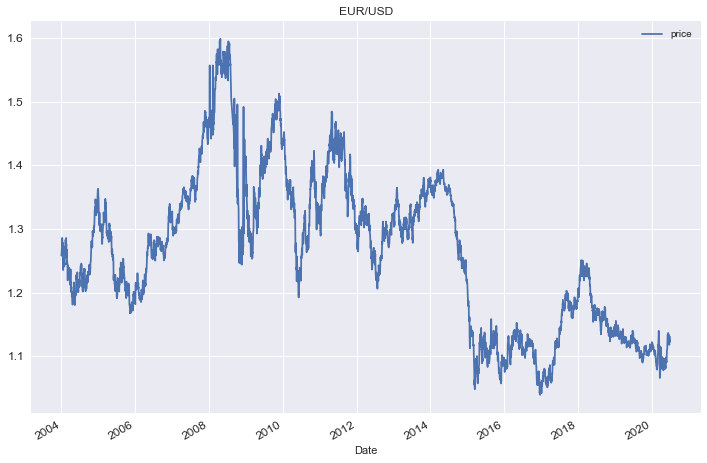

In [37]:
# 가격 차트 생성
df.plot(figsize=(12, 8), title='EUR/USD', fontsize=12)
plt.show()

- 일일 수익률 추가 (새로운 열 'returns' 생성)
- 로그 수익률 (가격을 이전 가격에서 이동한 값으로 나눈 다음 NP.log()를 자연로그로 취함)
    - 지수와 로그의 성질 때문에 계산이 편리하기 때문
    - '곱하기나 루트' 계산을 '더하기나 나누기'로 간편화 할 수 있음
    - 주식수익률은 좌우비대칭인 반면, 로그 수익률을 이용한 연속복리수익률의 확률분포는 무한대의 값을 갖기 때문에 비대칭 문제가 발생하지 않음
    - 수익의 착시현상을 없앨 수 있음

In [38]:
df['returns'] = np.log(df.div(df.shift(1))) 
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


- 첫 영업일은 수익이 없음(NAN)
- 두번째 타임스탬프부터 로그 수익률이 있음

### __A Simple Buy and Hold 'Strategy'__
- Buy & Hold는 적극적인 전략은 아님
- 투자자들이 지속적으로 매수, 중립 또는 매도 포지션을 취하기로 결정하는 것과 같음 <-- 패시브 전략
- 처음에는 롱포지션을 취하고 시간이 지남에 따라 롱포지션을 유지하는 것
- 예제의 경우 처음 1.25 달러를 1유로로 변환한 후 16년 동안 해당 유로를 보유하고 난 뒤, 유로를 1.12 달러로 변환 (13% 가량 손실)


- 일반적으로 첫번째 투자 가치를 1로 정규화함
- 결측값이 있는 모든 행을 삭제할 수 있음
    - 예제에서 첫번째 행을 .dropna()함

In [39]:
df.dropna(inplace=True)
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


- 실제 전략의 일일 수익률임
- 매수 후 보유하고 각각의 모든 타임스템프에 대해 우리는 하나의 롱포지션을 가지고 있음

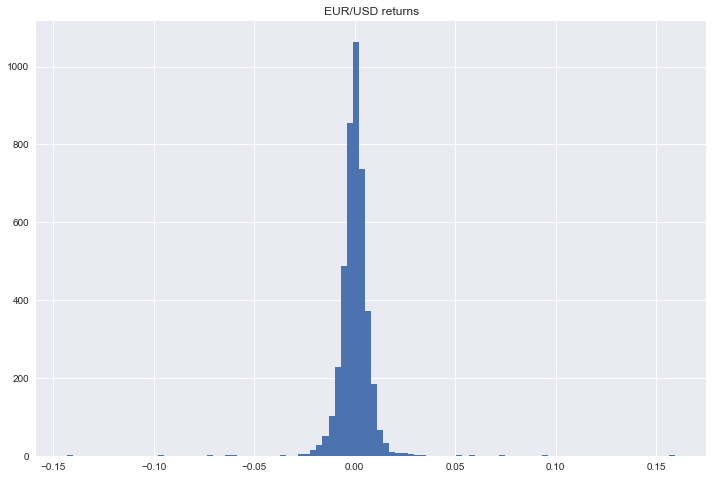

In [40]:
# 히스토그램으로 표현
df.returns.hist(bins=100, figsize=(12, 8))
plt.title('EUR/USD returns')
plt.show()

- 가장 빈번한 값이 0 근처에 있음
- 며칠은 높은 수익을 얻기도 하였음
- 문제는 시간 경과(16년)에 따른 누적 수익률
    - 로그 수익률로 작업중이므로 단순히 수익률을 더하면 됨

In [41]:
df.returns.sum()

-0.11214302770699758

In [42]:
# 2020년의 마지막 값을 명시적으로 계산
# 누적 수익률에 e제곱을 취함으로 수행(np.exp())
np.exp(df.returns.sum())

0.8939163935445148

In [43]:
# 가장 마지막 가격을 가장 첫 가격으로 나눔
df.price[-1]/df.price[0]


0.8939163935445141

In [44]:
# 각 타임스템프에 대해 시작부터 마지막 타임스템프까지 누적 수익을 계산할 수 있음
df.returns.cumsum()

Date
2004-01-02    0.000000
2004-01-05    0.008313
2004-01-06    0.010994
2004-01-07    0.004679
2004-01-08    0.015226
                ...   
2020-06-24   -0.106368
2020-06-25   -0.111817
2020-06-26   -0.114379
2020-06-29   -0.114042
2020-06-30   -0.112143
Name: returns, Length: 4274, dtype: float64

In [45]:
# np.exp()를 취해서 1달러의 투자 가치를 계산할 수 있음
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [46]:
# 누적 수익률, 누적 투자 가치를 열 'creturns'로 설정
df['creturns'] = df.returns.cumsum().apply(np.exp)
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


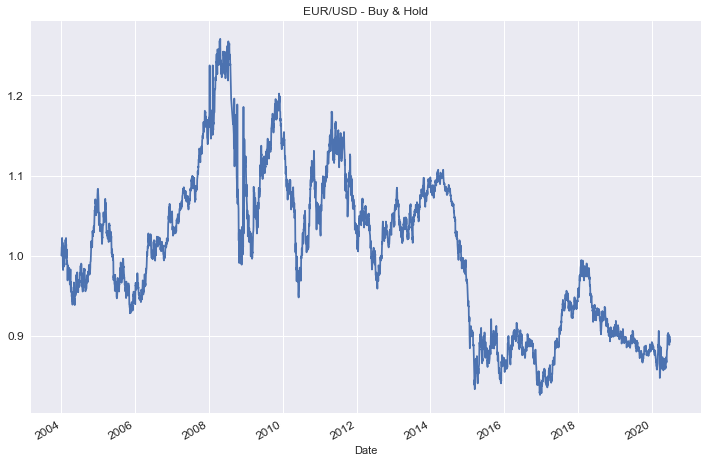

In [47]:
# 누적 투자 가치를 그래프로 시각화
df.creturns.plot(figsize=(12,8), title='EUR/USD - Buy & Hold', fontsize= 12)
plt.show()

- 초기 가격 차트와 거의 동일하게 보임
- 다른 점은 차트가 정규화되어서 투자가치가 1.0에서 시작해서 0.9 또는 0.8에서 끝난다는 것
- 이것이 전략의 성능을 시각화하고 전략을 비교하는 방법임 (시간 경과에 따른 1투자 가치의 진화)
- 전략을 위해 추가적으로 계산해 볼 수 있는 지표들이 있음 (수익, 위험, 최대 손실 등)

### More Performance Metrics

In [48]:
# 가격, 일일 수익률, 누적 수익률
df


,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [49]:
# 시간 경과에 따른 절대 성능을 볼 수 있는 개념 2가지
# 투자한 1달러에 대한 최종 가치
df.creturns.iloc[-1] # absolute Performance

0.8939163935445149

In [50]:
# 모든 로그 수익률에 대한 누적 합계
df.returns.sum() # absolute Performance

-0.11214302770699758

평균 수익률 또는 수익률의 표준편차를 계산하는 방법도 있음

- .describe()를 사용하면 몇가지 요약 통계를 얻을 수 있음
    - 일일 평균수익률 또는 일일 수익률의 표준편차 등
    - 이런 지표들은 연간화 하는 것이 일반적임


In [51]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


##### __annualized mean return and rist__

In [52]:
# mean return
# 일일 평균 수익률에 252를 곱하여 연간 평균 수익률을 구함(일반적으로 1년에 252일의 거래일이 있음)
df.returns.mean() * 252 

-0.006612083056191715

In [53]:
# risk
# risk는 수익률의 표준편차를 계산해야 함
# 연간화 하려면 252의 제곱근을 곱해주어야 함
df.returns.std() * np.sqrt(252)

0.12054120479431406

- 평균 분산 프레임워크의 기본 가정은 수익률이 정규 분포를 따른다는 것
- 정규 분표는 평균과 분산의 표준편차로 완전히 설명될 수 있음
- 일반적으로 금융쪽에서는 수익률이 정규 분포를 따르지 않는 상황이 있기 때문에 결과적으로 극단적인 결과와 꼬리 위험이 평균 분산 프레임워크에 완전히 반영되지 않게 됨
- 그러나 그것은 극단적인 부정적 결과의 경우 인기 있는 측정임


꼬리 위험 (tail risk)
> - 거대한 일회성 사건으로서 발생할 가능성은 극히 낮지만, 일단 발행하게 되면 자산 가치에 엄청난 영향을 줄 수 있는 위험  
> - 통계학의 정규 분포에서 나온 용어  
> - 정규 분포의 끝부분, 꼬리 부분에 해당되는 발생 가능성이 희박한 부분  

##### __Maximum drawdown__
- 최대 하락폭은 꼬리 위험을 측정하기 위한 위험 측정 정도임
- 일어날 수 있는 최악의 경우나 과거에 실제로 일어났던 경우
- 새로운 정점에 도달하기 전까지 높은 지점에서 낮은 지점으로의 가장 큰 움직임을 찾는 것
- 최대 하락폭 지표가 높으면 높을수록 위험도 높아지기 때문에 투자자들은 낮은 최대 하락폭을 선호함

In [54]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [55]:
# 열을 하나 생성
# .cummax()를 사용하여 누적 수익률의 누적 최대값을 계산함
df['cummax'] = df.creturns.cummax()
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


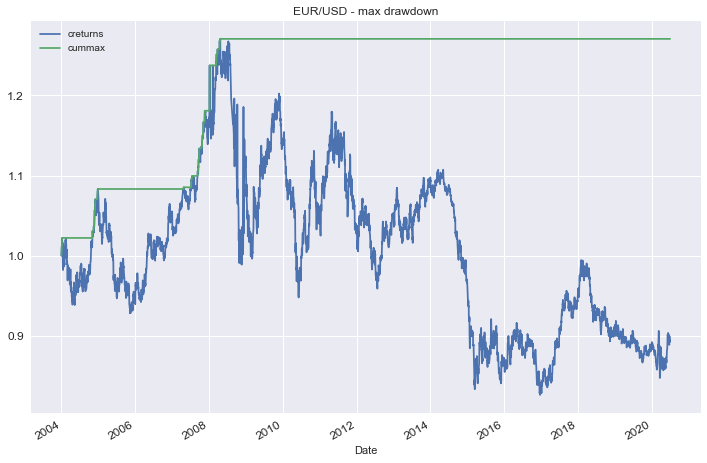

In [56]:
# cummax가 실제로 무슨 일을 하는지 이해하기 위해 cummax열과 creturns열을 시각화
df[['creturns', 'cummax']].dropna().plot(figsize=(12,8), title='EUR/USD - max drawdown', fontsize=12)
plt.show()


- 녹색으로 된 것이 cummax
- 시간 경과에 따른 누적 최대값을 나타냄
    - 맨 첫번째 타임스탬프에서 시작
    - 새로운 최대값에 도달할 때마다, 새로운 누적 최대값이 됨
- 누적 수익률 또는 누적 투자 합계는 1달러에서 시작하고 있고, 이제 각각의 모든 타임스탬프에 대해 누적 최대값과 누적 수익률 간의 거리를 계산할 수 있음
- 이 거리의 최대값이 최대 하락폭임
- 녹색선과 파란선의 거리를 계산하면 됨


In [57]:
drawdown = df['cummax'] - df['creturns']
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [58]:
# maximum drawdown
drawdown.max()

0.4448840569933439

In [59]:
# 최대하락폭을 가지는 날짜 조회
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

#### SMA는 가장 인기 있는 기술적 지표
- SMA에 기반한 매매전략은 주식, 통화, 상품 또는 어떤 것이든 사용할 수 있음

In [63]:
import yfinance as yf
from datetime import datetime
df = yf.download(tickers=["AAPL", "MSFT", "GE"], start=datetime(2010,1,1), end=datetime(2020,12,31))
ge = df.swaplevel(axis=1).GE.copy()
ge

[*********************100%***********************]  3 of 3 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,68.197784,92.776077,93.917015,90.974602,91.394943,11170816
2010-01-05 00:00:00-05:00,68.550934,93.256470,94.097160,92.776077,92.836128,10749611
2010-01-06 00:00:00-05:00,68.197784,92.776077,93.796913,92.716026,93.256470,9236570
2010-01-07 00:00:00-05:00,71.729080,97.580017,98.961151,92.655975,92.956223,30886702
2010-01-08 00:00:00-05:00,73.274055,99.681740,100.222183,97.700111,97.940308,19169701
...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,67.318794,67.822014,68.571426,66.323189,66.697891,9688283
2020-12-24 00:00:00-05:00,66.017052,66.510536,67.759560,66.323189,67.759560,4811708
2020-12-28 00:00:00-05:00,65.955063,66.448090,67.322403,66.073380,66.822792,8614197


In [72]:
import cufflinks as cf
qf = cf.QuantFig(df=ge.loc['2018':'2020'])

In [73]:
qf.add_sma(periods=20)
qf.add_sma(periods=100)
qf.iplot(title="GE", name="GE")

- SMA(단순이동평균)은 단순히 마지막 종가의 평균 가격
- 20일을 정의한다는 것은 마지막 20개의 종가를 보겠다는 것
- 이동평균선은 이 종가 데이터의 매끄러운 가격변동을 말하는 것
    - 가격추세와 추세의 변화를 식별하는데 도움이 될 수 있음
    - SMA를 계산하는데 사용하는 시간이 길어질 수록 단기 변동이 더 많이 제거됨
    - 기간이 짧을 수록 더 많은 최근 추세를 포함하고 표시할 수 있음
- 일반적으로 투자자들은 단기와 장기 SMA을 사용
    - 단기 SMA가 장기 SMA위로 교차하는 경우 자주 가까운 미래까지 지속될 상승 추세로 간주, 상품 매수 시기
    - 단기 SMA가 장기 SMA 아래로 교차하는 경우, 상품 매도 시기(short)